# Zeeman shift for SrF molecule

In [1]:
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import pandas
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from diatomic import hyperfine_hamiltonian_no_field, Zeeman_hamiltonian, SrFConstants

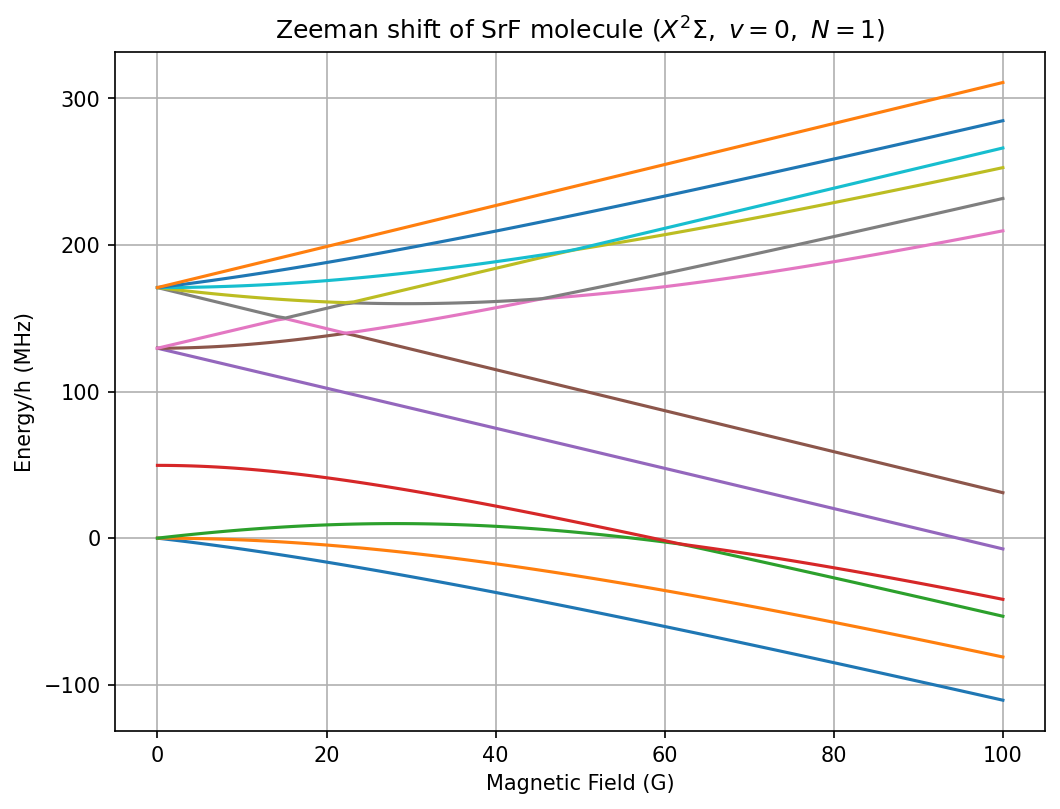

In [2]:
Nmax = 1
H0 = hyperfine_hamiltonian_no_field(Nmax, SrFConstants) # generate field-free hamiltonian

energy_list = np.array([])
Bz_list = np.linspace(0, 100, 100) # Gauss, generate a list of B field
for Bz in Bz_list:
    Hz = Zeeman_hamiltonian(Nmax, SrFConstants, Bfield=np.array([0, 0, Bz])) # generate Zeeman hamiltonian
    H = H0 + Hz

    energies, states = eigh(H) # diagonalize matrix
    energy_list = np.append(energy_list, energies[4:16]/1e6) # only keep energies of N=1 rotational levels

energy_list -= energy_list[0] # remove energy offset
energy_list = energy_list.reshape((-1, 12))

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(Bz_list, energy_list)

plt.ylabel("Energy/h (MHz)")
plt.xlabel("Magnetic Field (G)")
plt.title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=1$)")
plt.grid()
plt.show()


## Compared to John Barry's thesis Fig 2.5

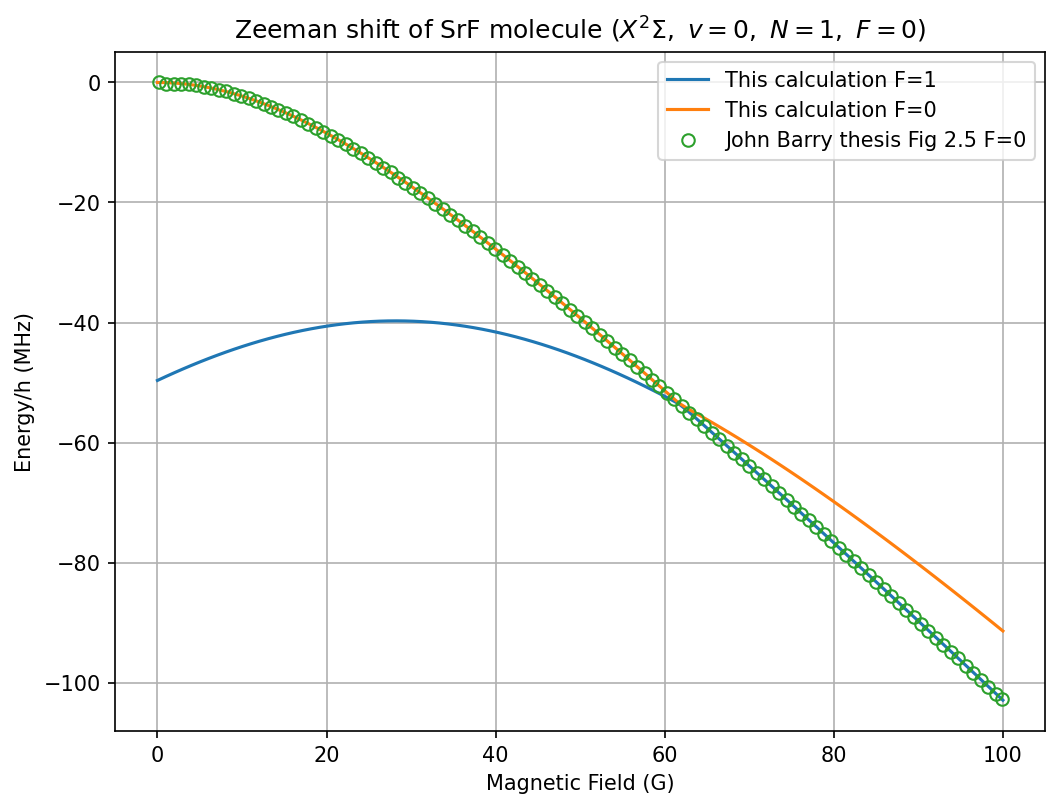

In [3]:
Nmax = 1
H0 = hyperfine_hamiltonian_no_field(Nmax, SrFConstants) # generate field-free hamiltonian

energy_list = np.array([])
Bz_list = np.linspace(0, 100, 100) # Gauss, generate a list of B field
for Bz in Bz_list:
    Hz = Zeeman_hamiltonian(Nmax, SrFConstants, Bfield=np.array([0, 0, Bz])) # generate Zeeman hamiltonian
    H = H0 + Hz

    energies, states = eigh(H) # diagonalize matrix
    energy_list = np.append(energy_list, energies[6:8]/1e6) # only keep energies of N=1, F=0 levels

energy_list = energy_list.reshape((-1, 2))
energy_list -= energy_list[0][1] # remove energy offset

df = pandas.read_csv('JohnBarryThesisFig2p5DataForZeemanShift.csv') # John Barry's calculation of Zeeman shift (thesis Fig 2.5)
df['Energy (MHz)'] -= df['Energy (MHz)'][0] # remove energy offset

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(Bz_list, energy_list, label=["This calculation F=1", "This calculation F=0"])
plt.plot(df['B field (G)'], df['Energy (MHz)'], 'o', markerfacecolor='none', label="John Barry thesis Fig 2.5 F=0")

plt.ylabel("Energy/h (MHz)")
plt.xlabel("Magnetic Field (G)")
plt.title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=1,\ F=0$)")
plt.grid()
plt.legend()
plt.show()